In [1]:
# if hit plotting library issues, try resetting LD path for julia
# can set in ~/.local/share/jupyter/kernels/
haskey(ENV, "LD_LIBRARY_PATH") && @assert ENV["LD_LIBRARY_PATH"] == ""
import Pkg
pkgs = [
    "Revise",
    "FASTX",
    "BioSequences",
    "Kmers",
    "Graphs",
    "MetaGraphs",
    "SparseArrays",
    "ProgressMeter",
    "Distributions",
    "HiddenMarkovModels",
    "BioAlignments",
    "StatsBase",
    "Random",
    "StatsPlots",
    "Statistics",
    # "GraphMakie",
    "IterTools",
    "Primes",
    "OnlineStats",
    "IteratorSampling",
    "HypothesisTests",
    "Clustering",
    "Distances",
    "BioAlignments",
    "Statistics",
    "Primes",
    "DataFrames",
    "BioSymbols",
    "LinearAlgebra"
]
# Pkg.add(pkgs)
for pkg in pkgs
    eval(Meta.parse("import $pkg"))
end
# Pkg.develop(path="/global/cfs/projectdirs/m4269/cjprybol/Mycelia")
# Pkg.develop(path="../../..")
import Mycelia

┌ Warning: The active manifest file is an older format with no julia version entry. Dependencies may have been resolved with a different julia version.
└ @ /global/cfs/cdirs/m4269/cjprybol/Mycelia/Manifest.toml:0
[ Info: Precompiling Mycelia [453d265d-8292-4a7b-a57c-dce3f9ae6acd]
[ Info: Skipping precompilation since __precompile__(false). Importing Mycelia [453d265d-8292-4a7b-a57c-dce3f9ae6acd].


In [2]:
PROJECT_BASEDIR = dirname(pwd())
data_dir = joinpath(PROJECT_BASEDIR, "data")
genome_dir = mkpath(joinpath(data_dir, "genomes"))

"/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes"

In [3]:
working_dir = joinpath(data_dir, "test")
mkpath(working_dir)

"/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/test"

In [4]:
short_read_sets = unique(map(x -> match(r"^(.+\.\d+x)\.", x).captures[1], filter(x -> occursin(r"\.fna\.art", x) && occursin(r"\.fq\.gz", x) && !occursin("trimming_report", x) && !occursin("_val_", x), sort(readdir(genome_dir, join=true), by=x->filesize(x)))))


18-element Vector{SubString{String}}:
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 68 bytes ⋯ ".fna.normalized.vcf.fna.art.10x"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 69 bytes ⋯ "fna.normalized.vcf.fna.art.100x"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 71 bytes ⋯ ".fna.normalized.vcf.fna.art.10x"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 76 bytes ⋯ ".fna.normalized.vcf.fna.art.10x"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 70 bytes ⋯ "na.normalized.vcf.fna.art.1000x"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 77 bytes ⋯ "fna.normalized.vcf.fna.art.100x"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 72 bytes ⋯ "fna.normalized.vcf.fna.art.100x"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 73 bytes ⋯ ".fna.normalized.vcf.fna.art.10x"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 76 bytes ⋯ ".fna.normalized.vcf.fna.art.10x"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 76 bytes ⋯ ".fna.normalized.vcf.fna.art.10x"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 78 bytes ⋯ "na.normalized.vcf.fna.art.1000x"
 "/global/cfs/cdirs/m4269/cjprybo" ⋯ 73 bytes ⋯ "na.normaliz

In [5]:
# short_read_set = short_read_sets[1]
short_read_set = short_read_sets[2]

"/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.100x"

In [6]:
forward = short_read_set * ".1_val_1.fq.gz"
reverse = short_read_set * ".2_val_2.fq.gz"

"/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.100x.2_val_2.fq.gz"

In [7]:
short_read_set_joint_fastq = short_read_set * ".joint.fq.gz"
if !isfile(short_read_set_joint_fastq)
    run(pipeline(`cat $(forward) $(reverse)`, short_read_set_joint_fastq))
end
short_read_set_joint_fastq
original_fastq = short_read_set_joint_fastq

"/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.100x.joint.fq.gz"

kmer_type = Kmers.Kmer{BioSequences.DNAAlphabet{4}, 3, 1}
(sampling_points, kmer_counts, hit_eof) = ([0, 1, 10, 68], [0, 1, 10, 32], false)
  5.008737 seconds (1.46 M allocations: 92.614 MiB, 2.00% gc time, 99.99% compilation time)
(k, predicted_saturation) = (3, 1.0)


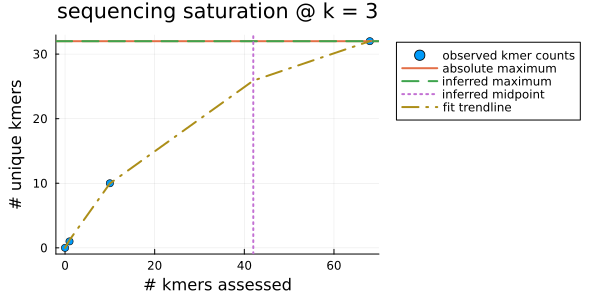

kmer_type = Kmers.Kmer{BioSequences.DNAAlphabet{4}, 5, 1}
(sampling_points, kmer_counts, hit_eof) = ([0, 1, 10, 100, 1000, 10000, 87331], [0, 1, 10, 93, 360, 441, 501], true)
  0.000096 seconds (194 allocations: 18.016 KiB)
(k, predicted_saturation) = (5, 0.978515625)


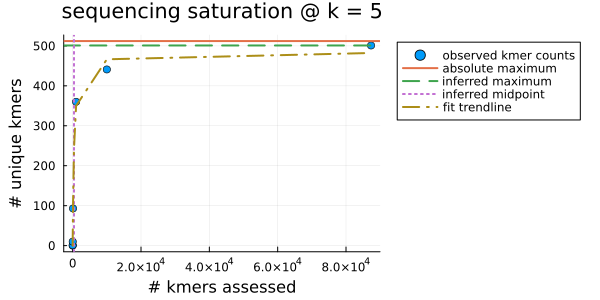

kmer_type = Kmers.Kmer{BioSequences.DNAAlphabet{4}, 7, 1}
(sampling_points, kmer_counts, hit_eof) = ([0, 1, 10, 100, 1000, 10000, 86131], [0, 1, 10, 100, 605, 985, 1915], true)
  0.000111 seconds (465 allocations: 44.000 KiB)
(k, predicted_saturation) = (7, 0.2337646484375)


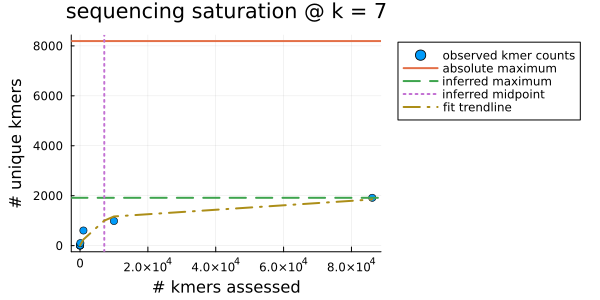

kmer_type = Kmers.Kmer{BioSequences.DNAAlphabet{4}, 11, 1}
(sampling_points, kmer_counts, hit_eof) = ([0, 1, 10, 100, 1000, 10000, 83731], [0, 1, 10, 100, 646, 1084, 2765], true)
  0.000084 seconds (285 allocations: 26.844 KiB)
(k, predicted_saturation) = (11, 0.0013184547424316406)


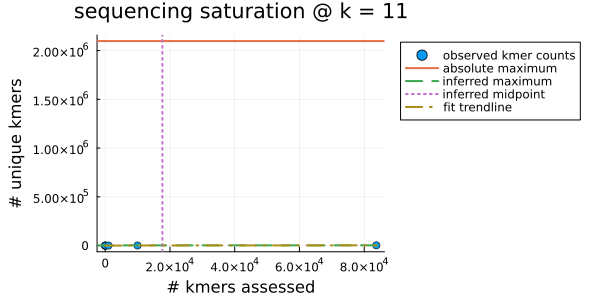

[ Info: polishing with k = 11
Progress: 100%|█████████████████████████████████████████| Time: 0:00:11
[ Info: polishing with k = 13
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
[ Info: polishing with k = 17
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
[ Info: polishing with k = 19
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
[ Info: polishing with k = 23
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
[ Info: polishing with k = 31
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
[ Info: polishing with k = 53
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
[ Info: polishing with k = 89
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


8-element Vector{@NamedTuple{fastq::String, k::Int64}}:
 (fastq = "/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.100x.joint.k11.fq.gz", k = 11)
 (fastq = "/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.100x.joint.k11.k13.fq.gz", k = 13)
 (fastq = "/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.100x.joint.k11.k13.k17.fq.gz", k = 17)
 (fastq = "/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.100x.joint.k11.k13.k17.k19.fq.gz", k = 19)
 (fastq = "/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.100x.joint.k11.k13.k17.k19.k23.fq.gz", k = 23)
 (fastq = "/global/cfs/cdirs/m4269/cjprybol/Mycelia/project

In [8]:
# almost no time at all for short reads
polishing_results = Mycelia.iterative_polishing(original_fastq)

In [9]:
# assembly_fastq = last(polishing_results).fastq
# assembly_k = last(polishing_results).k

assembly_fastq = "/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.100x.joint.k11.k13.k17.k19.k23.k31.k53.k89.fq.gz"
assembly_k = 89

89

In [10]:
mean_read_length = Statistics.mean([length(FASTX.sequence(record)) for record in Mycelia.open_fastx(assembly_fastq)])

143.23833333333334

In [11]:
kmer_graph = Mycelia.build_directed_kmer_graph(fastq=assembly_fastq, k=assembly_k)

{1422, 1419} directed Int64 metagraph with Float64 weights defined by :weight (default weight 1.0)

In [12]:
# heuristic - should be based on something better or removed altogether
max_filter = 5

initial_connected_components = length(Graphs.connected_components(kmer_graph))
coverage_threshold = 1
tresholded_vertices = [i for (i, (kmer, count)) in enumerate(MetaGraphs.get_prop(kmer_graph, :kmer_counts)) if count > coverage_threshold]
candidate_subgraph, vertex_map = Graphs.induced_subgraph(kmer_graph, tresholded_vertices)
while (length(Graphs.connected_components(candidate_subgraph)) == initial_connected_components) && (coverage_threshold < max_filter)
    coverage_threshold += 1
    tresholded_vertices = [i for (i, (kmer, count)) in enumerate(MetaGraphs.get_prop(kmer_graph, :kmer_counts)) if count > coverage_threshold]
    candidate_subgraph, vertex_map = Graphs.induced_subgraph(kmer_graph, tresholded_vertices)
end
coverage_threshold -= 1
@show coverage_threshold

tresholded_vertices = [i for (i, (kmer, count)) in enumerate(MetaGraphs.get_prop(kmer_graph, :kmer_counts)) if count > coverage_threshold]
filtered_graph, filtered_graph_vertex_map = Graphs.induced_subgraph(kmer_graph, tresholded_vertices)
# candidate_subgraph, vertex_map = Graphs.induced_subgraph(kmer_graph, [v for v in Graphs.vertices(kmer_graph) if kmer_graph.vprops[v][:count] >= coverage_threshold])

coverage_threshold = 2


({1123, 1120} directed Int64 metagraph with Float64 weights defined by :weight (default weight 1.0), [1, 3, 4, 7, 8, 9, 10, 11, 12, 13  …  1410, 1411, 1412, 1413, 1415, 1416, 1417, 1419, 1420, 1422])

In [13]:
connected_components = sort(Graphs.connected_components(filtered_graph), by=x->length(x), rev=true)

3-element Vector{Vector{Int64}}:
 [7, 8, 10, 11, 12, 13, 14, 15, 19, 29  …  1100, 1106, 1108, 1109, 1112, 1113, 1114, 1115, 1121, 1123]
 [9, 22, 23, 28, 30, 32, 35, 38, 48, 49  …  1089, 1097, 1103, 1104, 1105, 1107, 1111, 1119, 1120, 1122]
 [1, 2, 3, 4, 5, 6, 16, 17, 18, 20  …  1093, 1094, 1098, 1099, 1101, 1102, 1110, 1116, 1117, 1118]

In [14]:
length.(connected_components)

3-element Vector{Int64}:
 570
 277
 276

In [15]:
connected_component_sequences = BioSequences.LongDNA{2}[]
for connected_component in connected_components
    connected_component_subgraph, connected_component_subgraph_vertex_map = Graphs.induced_subgraph(filtered_graph, connected_component)
    sorted_connected_component_subgraph = Graphs.topological_sort_by_dfs(connected_component_subgraph)
    dsp_result = Graphs.dijkstra_shortest_paths(connected_component_subgraph, first(sorted_connected_component_subgraph))
    maxdist, maxdist_index = findmax(map(d -> d == Inf ? zero(d) : d, dsp_result.dists))
    connected_component_subgraph_longest_path = Graphs.enumerate_paths(dsp_result, maxdist_index)
    # @show connected_component_subgraph_longest_path
    original_graph_kmer_indices = filtered_graph_vertex_map[connected_component_subgraph_vertex_map[connected_component_subgraph_longest_path]]
    connected_component_subgraph_longest_path_reconstructed_sequence = Mycelia.kmer_path_to_sequence(kmer_graph.gprops[:ordered_kmers][original_graph_kmer_indices])
    push!(connected_component_sequences, connected_component_subgraph_longest_path_reconstructed_sequence)
end
connected_component_sequences
length.(connected_component_sequences)

3-element Vector{Int64}:
 658
 365
 364

In [16]:
# first_sequence_canonical_kmers = unique(last.(collect(Kmers.EveryCanonicalKmer{Kmers.DNAKmer{assembly_k}}(connected_component_sequences[1]))))
# second_sequence_canonical_kmers = unique(last.(collect(Kmers.EveryCanonicalKmer{Kmers.DNAKmer{assembly_k}}(connected_component_sequences[2]))))
# intersect(first_sequence_canonical_kmers, second_sequence_canonical_kmers)

In [17]:
assembled_contig_quality_table = DataFrames.DataFrame()
for (i, connected_component_sequence) in enumerate(connected_component_sequences)
    this_table = Mycelia.assess_assembly_quality(assembled_sequence=connected_component_sequence, fastq=original_fastq)
    this_table[!, "contig"] .= "$(i)"
    this_table[!, "contig_length"] .= length(connected_component_sequence)
    append!(assembled_contig_quality_table, this_table)
end
assembled_contig_quality_table

Progress: 100%|█████████████████████████████████████████| Time: 0:00:04
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


Row,k,cosine_distance,js_divergence,qv,contig,contig_length
,Int64,Float64,Float64,Float64,String,Int64
1,11,0.0,0.0,Inf,1,658
2,13,1.11022e-16,0.0,Inf,1,658
3,17,0.0,0.0,Inf,1,658
4,19,0.0,0.0,19.1414,1,658
5,23,1.11022e-16,0.0,Inf,1,658
6,31,0.0,0.0,Inf,1,658
7,53,0.0,0.0,30.6571,1,658
8,11,0.0,0.0,Inf,2,365
9,13,1.11022e-16,0.0,Inf,2,365


In [18]:
function pairwise_align_sequences(sequences)
    best_pairwise_alignments = Array{Any}(undef, length(sequences), length(sequences))
    # best_pairwise_alignment_scores = zeros(length(connected_component_sequences), length(connected_component_sequences))
    scoremodel = BioAlignments.AffineGapScoreModel(BioAlignments.EDNAFULL, gap_open=-5, gap_extend=-1)
    for (a, a_seq) in enumerate(sequences)
        for (b, b_seq) in enumerate(sequences)
            b_seq_revcom = BioSequences.reverse_complement(b_seq)
            forward_alignment = BioAlignments.pairalign(BioAlignments.OverlapAlignment(), a_seq, b_seq, scoremodel)
            reverse_complement_alignment = BioAlignments.pairalign(BioAlignments.OverlapAlignment(), a_seq, b_seq_revcom, scoremodel)
            if BioAlignments.score(forward_alignment) > BioAlignments.score(reverse_complement_alignment)
                best_alignment = forward_alignment
            else
                best_alignment = reverse_complement_alignment
            end
            best_pairwise_alignments[a, b] = best_alignment
            # best_pairwise_alignment_scores[a, b] = BioAlignments.score(best_alignment)
        end
    end
    best_pairwise_alignments
end

function find_best_alignment(best_pairwise_alignments)
    alignment_scores = BioAlignments.score.(best_pairwise_alignments)
    off_diagonal_mask = .!Matrix(LinearAlgebra.I, size(best_pairwise_alignments))
    max_off_diagonal_score = maximum(alignment_scores[off_diagonal_mask])
    return findfirst(alignment_scores .== max_off_diagonal_score)
end

"""
pass in alignment_result.aln or BioAlignments.alignment(alignment_result)
"""
function consensus_sequence(alignment)
    consensus_symbols = BioSymbols.DNA[]
    for alignment_tuple in collect(alignment)
        push!(consensus_symbols, rand(filter(x -> x != BioSymbols.DNA_Gap, alignment_tuple)))
    end
    consensus_seq = BioSequences.LongDNA{2}(consensus_symbols)
    return consensus_seq
end

consensus_sequence

In [19]:
assembly_sequences = deepcopy(connected_component_sequences)
best_pairwise_alignments = pairwise_align_sequences(assembly_sequences)
best_pairwise_alignment_index = find_best_alignment(best_pairwise_alignments)
best_alignment = best_pairwise_alignments[best_pairwise_alignment_index]

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 1560
  seq:   1 CCATGTAAAAACGGAACCGCTTTGGCGTCTCAGAGATACGCGCCAACAAGCAGTAGCATT  60
                                                               ||||||||
  ref:   0 ----------------------------------------------------GTAGCATT   8

  seq:  61 GGGCCTAAACAAGGCGAAGCAAGTCGATTCTGCTACCTTGGCGCTATGGTTTGGACAAAT 120
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:   9 GGGCCTAAACAAGGCGAAGCAAGTCGATTCTGCTACCTTGGCGCTATGGTTTGGACAAAT  68

  seq: 121 CGCTGGTCTAACCTATAGAACAGTGTGGTATGAAGCGTAAATGTCCGCTTAGTTTCGAGG 180
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref:  69 CGCTGGTCTAACCTATAGAACAGTGTGGTATGAAGCGTAAATGTCCGCTTAGTTTCGAGG 128

  seq: 181 CTTTGCTCGTTCCCATCGATCGCGAGTGTAGGAATAGAACCCTCATATAGAATAGGATTC 240
           ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
  ref

In [20]:
alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(best_pairwise_alignment_index))]...]
best_pairwise_alignments = pairwise_align_sequences(assembly_sequences)
best_pairwise_alignment_index = find_best_alignment(best_pairwise_alignments)
best_alignment = best_pairwise_alignments[best_pairwise_alignment_index]

BioAlignments.PairwiseAlignmentResult{Int64, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}, BioSequences.LongSequence{BioSequences.DNAAlphabet{2}}}:
  score: 513
  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:   1 AGATTGGTGCTTGCGTTCTCTAGGTAGGACTTACGCCAGTAGGGATACTTGGACGGGTAG  60

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref:  61 GGGTTAGAATATGGTGAAATCGAGTCCTCTTTGAGCGTTGAATGTGCGATACAGGGCATA 120

  seq:   0 ------------------------------------------------------------   0
                                                                       
  ref: 121 AAGGTACTAAAGCAGAGTGACCCCTGCCCTATATCAAAGAACAAATATGCGTGGACGCCT 180

  seq:   0 -------------ACGGTTG-------AGGG--------TGTTCTACT------T-TGGG  25
                        |  || |       ||||        | || ||||      | | ||
  ref:

In [ ]:
# alignment_consensus = consensus_sequence(BioAlignments.alignment(best_alignment))
# assembly_sequences = [alignment_consensus, [assembly_sequence for (i, assembly_sequence) in enumerate(assembly_sequences) if !(i in Tuple(best_pairwise_alignment_index))]...]
# best_pairwise_alignments = pairwise_align_sequences(assembly_sequences)
# best_pairwise_alignment_index = find_best_alignment(best_pairwise_alignments)
# best_alignment = best_pairwise_alignments[best_pairwise_alignment_index]

In [ ]:
# no more good alignment overlaps - any kmer overlaps?

In [22]:
assembly_sequence_canonical_kmer_counts = Mycelia.count_canonical_kmers.(Kmers.DNAKmer{assembly_k}, assembly_sequences)

2-element Vector{OrderedCollections.OrderedDict{Kmers.DNAKmer{89, 3}, Int64}}:
 OrderedCollections.OrderedDict(AAAAACGGAACCGCTTTGGCGTCTCAGAGATACGCGCCA…CATTGGGCCTAAACAAGGCGAAGCAAGTCGATTCTGCTA => 1, AAAAATGGAGGGATGTAATTGGGCACACTGTGTGTGTAA…GGCACACGTGTGGGTCGAACGATCGTTCGGCACGCGTAA => 1, AAAACGGAACCGCTTTGGCGTCTCAGAGATACGCGCCAA…ATTGGGCCTAAACAAGGCGAAGCAAGTCGATTCTGCTAC => 1, AAAATGGAGGGATGTAATTGGGCACACTGTGTGTGTAAC…GCACACGTGTGGGTCGAACGATCGTTCGGCACGCGTAAC => 1, AAACAAGGCGAAGCAAGTCGATTCTGCTACCTTGGCGCT…AAATCGCTGGTCTAACCTATAGAACAGTGTGGTATGAAG => 1, AAACGGAACCGCTTTGGCGTCTCAGAGATACGCGCCAAC…TTGGGCCTAAACAAGGCGAAGCAAGTCGATTCTGCTACC => 1, AAACTAAGCGGACATTTACGCTTCATACCACACTGTTCT…CAGCGATTTGTCCAAACCATAGCGCCAAGGTAGCAGAAT => 1, AAAGAACAAATATGCGTGGACGCCTCTTGGATAATCTCA…GGGACCTACCCTCTTTACTGAGAAGTATAGGCCAGACAT => 1, AAAGAGGACTCGATTTCACCATATTCTAACCCCTACCCG…CTACTGGCGTAAGTCCTACCTAGAGAACGCAAGCACCAA => 1, AAAGAGGGTAGGTCCCTGGGATGGCACTGAGATTATCCA…CGCATATTTGTTCTTTGATATAGGGCAGGGGTCACTCTG => 1…)
 OrderedCollections.OrderedD

In [24]:
length.(assembly_sequences)

2-element Vector{Int64}:
 710
 365

In [23]:
Mycelia.jaccard_similarity(keys(assembly_sequence_canonical_kmer_counts[1]), keys(assembly_sequence_canonical_kmer_counts[2]))

0.0

In [25]:
final_assembly_sequences = assembly_sequences
assembly_fasta = replace(assembly_fastq, Mycelia.FASTQ_REGEX => ".assembly_k$(assembly_k).fna")
open(assembly_fasta, "w") do io
    fastx_io = FASTX.FASTA.Writer(io)
    for (i, sequence) in enumerate(final_assembly_sequences)
        identifier = "contig$(i)_length=$(length(sequence))"
        fasta_record = FASTX.FASTA.Record(identifier, sequence)
        write(fastx_io, fasta_record)
    end
    close(fastx_io)
end
assembly_fasta

"/global/cfs/cdirs/m4269/cjprybol/Mycelia/projects/variant-calling-benchmarking/data/genomes/fF3EHHs.fna.normalized.vcf.fna.art.100x.joint.k11.k13.k17.k19.k23.k31.k53.k89.assembly_k89.fna"

KeyError: KeyError: key "usage_request" not found

KeyError: KeyError: key "usage_request" not found

In [ ]:
# readlines(assembly_fasta)